<a href="https://colab.research.google.com/github/vipinksaini/a-PyTorch-Tutorial-to-Image-Captioning/blob/master/testing_APP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch==0.4.1 torchvision==0.2.0
!pip install Pillow
!pip install scipy==1.1.0

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#!pip install torchviz

     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 753.2MB 24kB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=b3c1d16a9f98f646a35a7bba1e45d412444a367695a0b2bfe5d5e3486c917113
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [4]:
cd "/content/drive/My Drive/Colab/pytorch/ShowAttandTell"

/content/drive/My Drive/Colab/pytorch/ShowAttandTell


In [ ]:
!pip install pandas

In [ ]:
!pip install os

  ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
import torch
import torchvision
import skimage
from torchviz import make_dot

In [ ]:
print(torch.__version__)
print(torchvision.__version__)
print(skimage.__version__)

0.4.1
0.2.0
0.15.0


In [ ]:
#str1 = out(r"!python caption.py --img='/content/drive/My Drive/Photo0446.jpg' --model='/content/drive/My Drive/Colab/pytorch/ShowAttandTell/BEST_checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar' --word_map='/content/drive/My Drive/Colab/Data/coco/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json' --beam_size=5")

In [ ]:
import tensorflow

In [13]:
from caption import Caption
modelname='checkpoint_flickr8k_5_cap_per_img_5_min_word_freq'
capt = Caption()
word_map='/content/drive/My Drive/Colab/Data/Flickr8k/WORDMAP_flickr8k_5_cap_per_img_5_min_word_freq.json'
capt.set_model(model='checkpoint_flickr8k_5_cap_per_img_5_min_word_freq.pth.tar', word_map=word_map)
capt.geneateCaption( img='/content/drive/My Drive/Photo0446.jpg',  beam_size=10)

{'Time': '20200723183833941', 'Model': '/content/drive/My Drive/Colab/pytorch/ShowAttandTell/checkpoint_flickr8k_5_cap_per_img_5_min_word_freq.pth.tar', 'Total_Time': 3.383059024810791, 'FPS': nan, 'Size': '110.85943794250488', 'Encoder_Parms': 1261760.0, 'loading': 3.1647660732269287, 'Decoder_Parms': 9260106.0}
cuda
{'epoch': 52, 'epochs_since_improvement': 23, 'bleu-4': 0.11850929054284164, 'encoder': Encoder(
  (resnet): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (3): Fire(
        (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (expand3x3_activation): Re

/content/drive/My Drive/Colab/pytorch/ShowAttandTell/caption.py:262: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(np.ceil(len(words) / 5.), 5, t + 1)


'<start> young man with <unk> in the background <end>'

In [ ]:
import pandas as pd
df=pd.read_csv("evalaution_data.csv")

In [ ]:
df.drop(df[df['Model'].str.contains('SQueezeNetv1_LSTM_ATT_BEST_checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar')].index, axis=0, inplace=True)
print(df)

Empty DataFrame
Columns: [Time, Model, Total_Time, FPS, Size, Encoder_Parms, loading, Decoder_Parms]
Index: []


In [ ]:
fps=capt.eval_time( image_path='1.jpg', beam_size=10)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def show_stat(fps):
    fig,ax=plt.subplots()
    ax.plot(fps)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("FPS")

In [ ]:
show_stat(fps)

In [ ]:
import time
t0 = time.time()

In [ ]:
t1=time.time()-t0

In [ ]:
print(1/t1)

0.03295514661345197


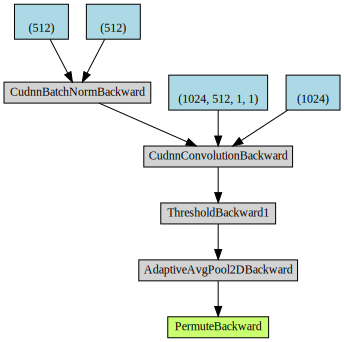

In [ ]:
x = torch.zeros(1, 3, 244, 244, requires_grad=False)
x = x.to('cuda')
out = capt.encoder(x)
make_dot(out)

In [ ]:
enc,dec, dec1=capt.model_viz(image_path='1.jpg', beam_size=10)

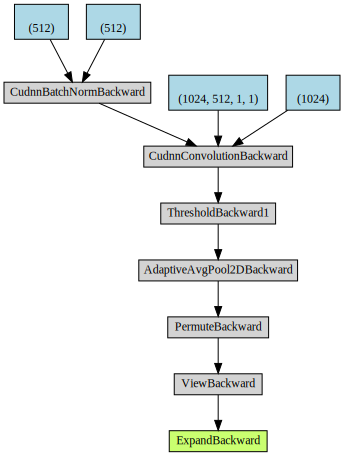

In [ ]:
make_dot(enc)

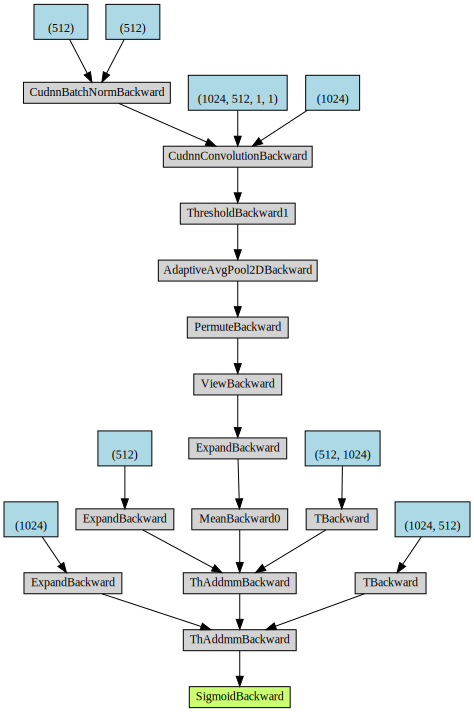

In [ ]:
make_dot(dec)

In [ ]:
dot = make_dot(dec1)

In [ ]:
print(dot)
dot.format("png")
dot.render(modelname)

digraph {
	graph [size="25.8,25.8"]
	node [align=left fontsize=12 height=0.2 ranksep=0.1 shape=box style=filled]
	1505970645256 [label=ThAddmmBackward fillcolor=darkolivegreen1]
	1505970644976 -> 1505970645256
	1505970644976 [label=ExpandBackward]
	1505970644920 -> 1505970644976
	1505970644920 [label="
 (9490)" fillcolor=lightblue]
	1505653815304 -> 1505970645256
	1505653815304 [label=LSTMFusedBackward]
	1505970645144 -> 1505653815304
	1505970645144 [label=MmBackward]
	1505970645592 -> 1505970645144
	1505970645592 [label=CatBackward]
	1505970645760 -> 1505970645592
	1505970645760 [label=SqueezeBackward1]
	1505970645928 -> 1505970645760
	1505970645928 [label=EmbeddingBackward]
	1505970646040 -> 1505970645928
	1505970646040 [label="
 (9490, 512)" fillcolor=lightblue]
	1505970645816 -> 1505970645592
	1505970645816 [label=ThMulBackward]
	1505970642616 -> 1505970645816
	1505970642616 [label=SigmoidBackward]
	1505970642168 -> 1505970642616
	1505970642168 [label=ThAddmmBackward]
	150597064132

TypeError: 'str' object is not callable

In [ ]:
caption=(gen_sentance( img='1.jpg', model='BEST_checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar', word_map='WORDMAP_coco_5_cap_per_img_5_min_word_freq.json', beam_size=10))

cuda


D:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\torch\serialization.py:425: SourceChangeWarning: source code of class 'models.Encoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
D:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\torch\serialization.py:425: SourceChangeWarning: source code of class 'models.DecoderWithAttention' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


{'epoch': 1, 'epochs_since_improvement': 0, 'bleu-4': 0.19428524375224035, 'encoder': Encoder(
  (resnet): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (3): Fire(
        (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (expand3x3_activation): ReLU(inplace)
      )
      (4): Fire(
        (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3)

AttributeError: 'DecoderWithAttention' object has no attribute 'grad_fn'

In [ ]:
import json

In [ ]:
# Load word map (word2ix)
word_map='WORDMAP_coco_5_cap_per_img_5_min_word_freq.json'
with open(word_map, 'r') as j:
    word_map = json.load(j)
rev_word_map = {v: k for k, v in word_map.items()}  # ix2word

In [ ]:
print(rev_word_map)

{1: 'a', 2: 'man', 3: 'with', 4: 'red', 5: 'helmet', 6: 'on', 7: 'small', 8: 'moped', 9: 'dirt', 10: 'road', 11: 'riding', 12: 'motor', 13: 'bike', 14: 'the', 15: 'countryside', 16: 'back', 17: 'of', 18: 'motorcycle', 19: 'path', 20: 'young', 21: 'person', 22: 'rests', 23: 'to', 24: 'foreground', 25: 'verdant', 26: 'area', 27: 'bridge', 28: 'and', 29: 'background', 30: 'cloud', 31: 'mountains', 32: 'in', 33: 'shirt', 34: 'hat', 35: 'is', 36: 'hill', 37: 'side', 38: 'woman', 39: 'wearing', 40: 'net', 41: 'her', 42: 'head', 43: 'cutting', 44: 'cake', 45: 'large', 46: 'white', 47: 'sheet', 48: 'hair', 49: 'there', 50: 'that', 51: 'marking', 52: 'chefs', 53: 'knife', 54: 'child', 55: 'holding', 56: 'flowered', 57: 'umbrella', 58: 'petting', 59: 'yak', 60: 'an', 61: 'next', 62: 'herd', 63: 'cattle', 64: 'boy', 65: 'barefoot', 66: 'touching', 67: 'horn', 68: 'cow', 69: 'who', 70: 'while', 71: 'standing', 72: 'livestock', 73: 'front', 74: 'computer', 75: 'keyboard', 76: 'little', 77: 'headpho

In [ ]:
# USAGE
# tkinter_test.py

# import the necessary packages
from caption import gen_sentance
from tkinter import *
from PIL import Image
from PIL import ImageTk
from tkinter.filedialog import askopenfilename
import cv2

def select_image():
	# grab a reference to the image panels
	global panelA, panelB, var

	# open a file chooser dialog and allow the user to select an input
	# image
	path = askopenfilename()
	print(path)
	caption=(gen_sentance( img=path, model='BEST_checkpoint_flickr8k_5_cap_per_img_5_min_word_freq.pth.tar', word_map='WORDMAP_flickr8k_5_cap_per_img_5_min_word_freq.json',beam_size=5))
	# ensure a file path was selected
	if len(path) > 0:
		# load the image from disk, convert it to grayscale, and detect
		# edges in it
		image = cv2.imread(path)
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
		edged = cv2.Canny(gray, 50, 100)

		# OpenCV represents images in BGR order; however PIL represents
		# images in RGB order, so we need to swap the channels
		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

		# convert the images to PIL format...
		image = Image.fromarray(image)
		edged = Image.fromarray(edged)

		# ...and then to ImageTk format
		image = ImageTk.PhotoImage(image)
		edged = ImageTk.PhotoImage(edged)

		# if the panels are None, initialize them
		if panelA is None or panelB is None:
			# the first panel will store our original image
			panelA = Label(image=image)
			panelA.image = image
			panelA.pack(side="left", padx=10, pady=10)

			# while the second panel will store the edge map
			panelB = Label(image=edged)
			panelB.image = edged
			panelB.pack(side="right", padx=10, pady=10)

		# otherwise, update the image panels
		else:
			# update the pannels
			panelA.configure(image=image)
			panelB.configure(image=edged)
			panelA.image = image
			panelB.image = edged
                                    
		var.set(caption)

# initialize the window toolkit along with the two image panels
root = Tk()
panelA = None
panelB = None

# create a button, then when pressed, will trigger a file chooser
# dialog and allow the user to select an input image; then add the
# button the GUI
var = StringVar()
label = Label( root, textvariable=var, relief=RAISED )
label.pack()
btn = Button(root, text="Select an image", command=select_image)
btn.pack(side="bottom", fill="both", expand="yes", padx="10", pady="10")



# kick off the GUI
root.mainloop()

F:/MachineLearning_AI/LJMU/Research-Source/APP/Photo0446.jpg
cuda
{'epoch': 0, 'epochs_since_improvement': 0, 'bleu-4': 0.08824318386545674, 'encoder': Encoder(
  (resnet): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (3): Fire(
        (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (expand3x3_activation): ReLU(inplace)
      )
      (4): Fire(
        (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): Re

Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\envs\tf_gpu\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-4-4235e0cefe1f>", line 20, in select_image
    caption=(gen_sentance( img=path, model='BEST_checkpoint_flickr8k_5_cap_per_img_5_min_word_freq.pth.tar', word_map='WORDMAP_flickr8k_5_cap_per_img_5_min_word_freq.json',beam_size=5))
  File "F:\MachineLearning_AI\LJMU\Research-Source\APP\caption.py", line 218, in gen_sentance
    seq, alphas = caption_image_beam_search(encoder, decoder, img, word_map, beam_size)
  File "F:\MachineLearning_AI\LJMU\Research-Source\APP\caption.py", line 83, in caption_image_beam_search
    make_dot(decoder)
  File "D:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\torchviz\dot.py", line 37, in make_dot
    output_nodes = (var.grad_fn,) if not isinstance(var, tuple) else tuple(v.grad_fn for v in var)
  File "D:\ProgramData\Anaconda3\envs\tf_gpu\lib\s